# DFA and Factor Investing

## 2. The Factors

DFA believes certain stocks have higher expected excess returns. In addition to the overall market equity premium, DFA believes that there is a premium attached to a size and value factor. Note that these three factors are already listed as excess returns.

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from utils import *
%config InlineBackend.figure_format = 'retina'

### Data

Use the data found in `data/dfa_analysis_data.xlsx`.

- Monthly **excess** return data for the overall equity market, $\tilde{r}^{mkt}$.

- The sheet also contains data on two additional factors, `SMB` and `HML`, as well as the risk-free rate.

- You do not need any of these columns for the homework. Just use the `MKT` column, which is **excess** market returns. (So no need to subtract the risk-free rate.)

In [2]:
returns = pd.read_excel("../data/dfa_analysis_data.xlsx", sheet_name = "portfolios (total returns)").set_index("Date")
factors = pd.read_excel("../data/dfa_analysis_data.xlsx", sheet_name = "factors").set_index("Date")
factors.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0289,-0.0255,-0.0239,0.0022
1926-08-31,0.0264,-0.0114,0.0381,0.0025
1926-09-30,0.0038,-0.0136,0.0005,0.0023
1926-10-31,-0.0327,-0.0014,0.0082,0.0032
1926-11-30,0.0254,-0.0011,-0.0061,0.0031


### 1. The Factors

Calculate their univariate performance statistics:

- mean

- volatility

- Sharpe

- VaR(.05)

Report these for the following three subsamples:

- Beginning - 1980

- 1981 - 2001

- 2002 - End

In [3]:
sample_1980 = factors.loc[:"1980-12-31"]
sample_2001 = factors.loc["1981-01-01":"2001-12-31"]
sample_2025 = factors.loc["2002-01-01":]
sample_1980

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0289,-0.0255,-0.0239,0.0022
1926-08-31,0.0264,-0.0114,0.0381,0.0025
1926-09-30,0.0038,-0.0136,0.0005,0.0023
1926-10-31,-0.0327,-0.0014,0.0082,0.0032
1926-11-30,0.0254,-0.0011,-0.0061,0.0031
...,...,...,...,...
1980-08-31,0.0175,0.0390,-0.0246,0.0064
1980-09-30,0.0219,0.0096,-0.0461,0.0075
1980-10-31,0.0104,0.0239,-0.0293,0.0095


In [4]:
samples = {
    'Beginning - 1980': sample_1980,
    '1981 - 2001': sample_2001,
    '2002 - End': sample_2025
}

results = {}
for period_name, sample_data in samples.items():
    mean, std, sharpe = Calc_MeanStdSharpe_Stock(sample_data, 12)
    var = Calc_Var(sample_data)
    
    results[period_name] = pd.DataFrame({
        'Mean': mean,
        'Volatility': std,
        'Sharpe': sharpe,
        'VaR(0.05)': var
    })

# Display results
for period, result in results.items():
    print(f"\n{period}:")
    print(result)


Beginning - 1980:
            Mean  Volatility    Sharpe  VaR(0.05)
Mkt-RF  0.080958    0.204988  0.394938  -0.084090
SMB     0.033914    0.114277  0.296769  -0.041875
HML     0.050321    0.134228  0.374893  -0.044245
RF      0.027730    0.007673  3.614032   0.000000

1981 - 2001:
            Mean  Volatility    Sharpe  VaR(0.05)
Mkt-RF  0.077852    0.157183  0.495298  -0.064135
SMB    -0.002014    0.117260 -0.017178  -0.045880
HML     0.064557    0.109863  0.587613  -0.041640
RF      0.063081    0.007752  8.137239   0.002455

2002 - End:
            Mean  Volatility    Sharpe  VaR(0.05)
Mkt-RF  0.091306    0.153529  0.594711  -0.077265
SMB     0.007931    0.088448  0.089669  -0.039195
HML     0.001204    0.106442  0.011313  -0.041485
RF      0.015837    0.005213  3.038090   0.000000


### 2.

Based on the factor statistics above, answer the following.

- Does each factor have a premium (positive expected excess return) in each subsample?
  
  - No, The SMB factor had a negative premium during 1981-2001, meaning small stocks underperformed large stocks during this period on average.

- Does the premium to the size factor get smaller after 1980?

  - Yes, The size premium declined by 3.6% from Beginning - 1980 to 1981 - 2001, and has remained much smaller (0.8%) after 2002.

- Does the premium to the value factor get smaller during the 1990’s?

  - No, The value factor premium increased during the 1981-2001 period, rising from 5.0% to 6.5%

- How have the factors performed since the time of the case, (2002-present)?
  
  - Market Premium
    - 9.1% annual return, highest of all time

  - Size Premium
    - 0.8% annual return, lower than historical
    - Size effect has disappeared in modern market
  
  - Value Premium
    - 0.1% annual return and 0.01 sharpe, nearly zero
    - Growth stocks have dominated value stocks in the 21st century

### 3.

The factors are constructed in such a way as to reduce correlation between them.

- Report the correlation matrix across the three factors.

- Does the construction method succeed in keeping correlations small?
  - Yes, the construction method generally succeeds in keeping correlations small, especially between the factor portfolios (`SMB` and `HML`) and the market (`Mkt-RF`).

- Does it achieve this in each subsample?

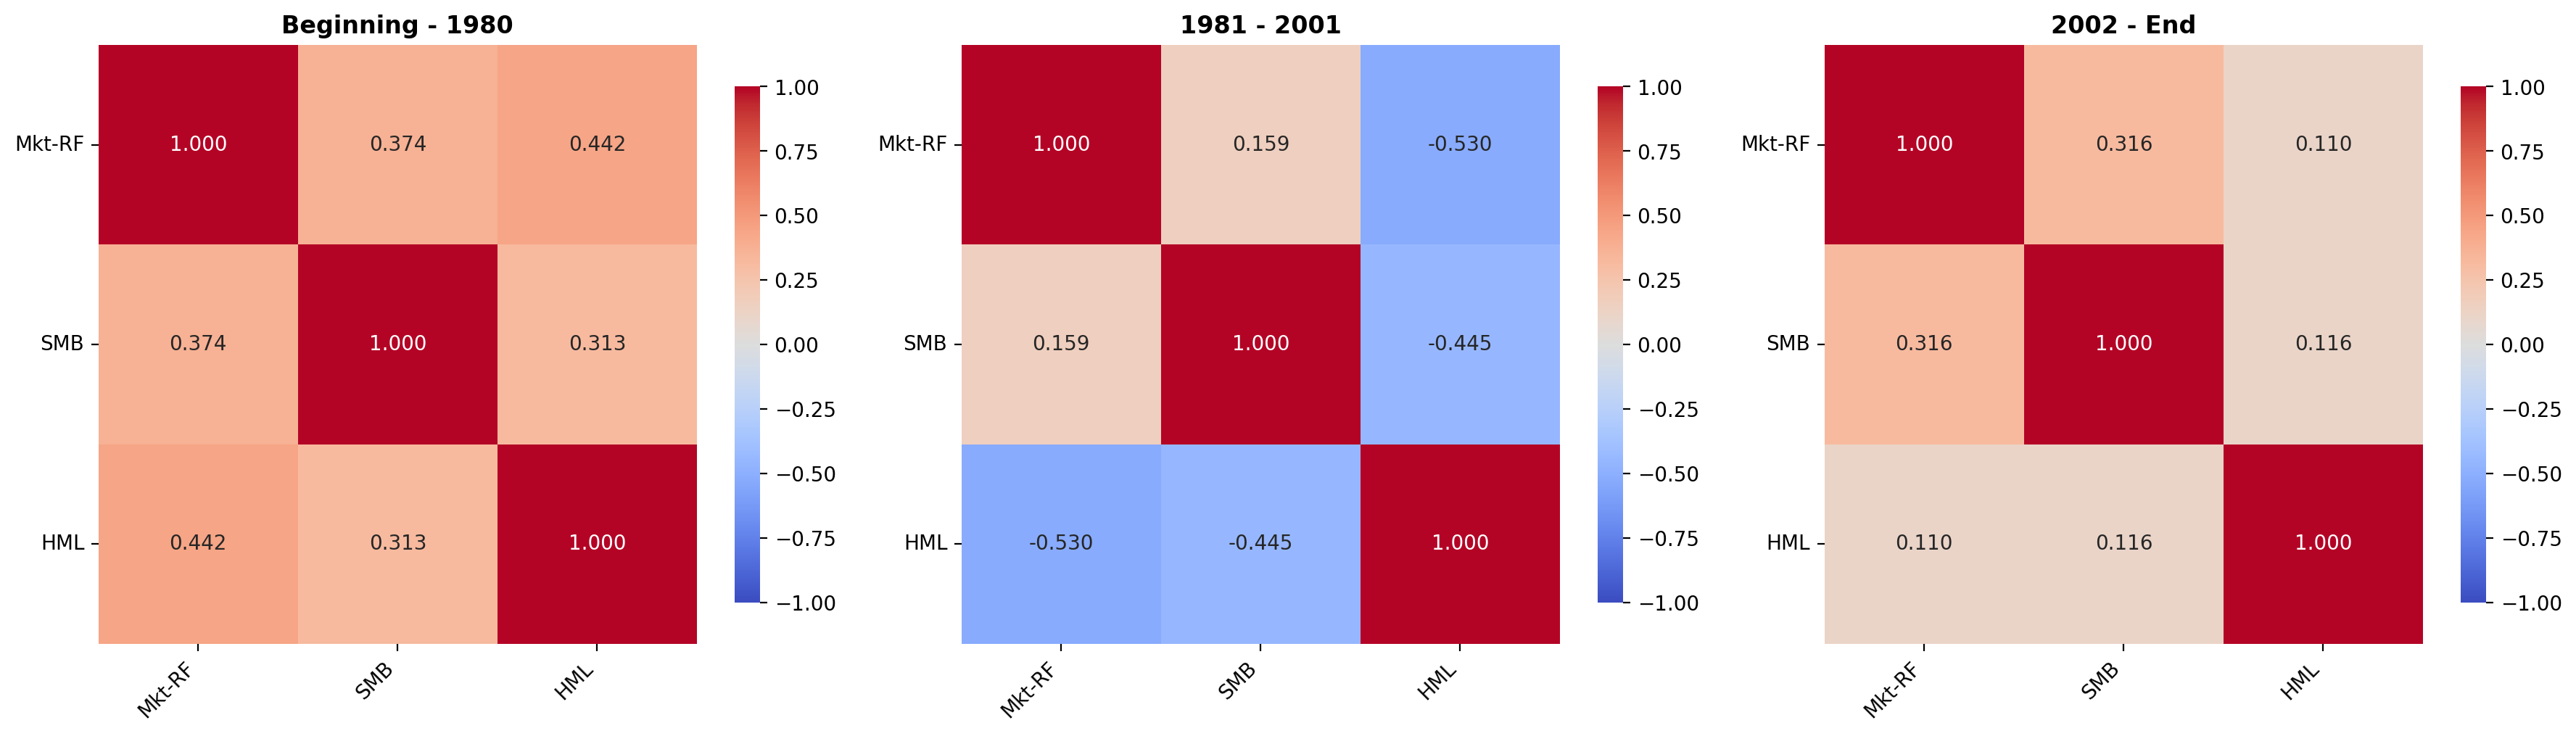


Correlation Summary:

Beginning - 1980:
  Mean absolute correlation: 0.377
  Max absolute correlation: 0.442

1981 - 2001:
  Mean absolute correlation: 0.378
  Max absolute correlation: 0.530

2002 - End:
  Mean absolute correlation: 0.181
  Max absolute correlation: 0.316


In [5]:
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
col = ["Mkt-RF", "SMB", "HML"]

samples = {
    'Beginning - 1980': sample_1980[col],
    '1981 - 2001': sample_2001[col],
    '2002 - End': sample_2025[col]
}

for idx, (period_name, sample_data) in enumerate(samples.items()):
    corr_matrix = sample_data.corr()
    
    sns.heatmap(corr_matrix, annot = True, fmt = '.3f', cmap = 'coolwarm', center = 0,
                vmin = -1, vmax = 1, square = True, cbar_kws = {'shrink': 0.8}, ax = axes[idx])
    
    axes[idx].set_title(f'{period_name}', fontsize = 12, fontweight = 'bold')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation = 45, ha = 'right')
    axes[idx].set_yticklabels(axes[idx].get_yticklabels(), rotation = 0)

plt.tight_layout()
plt.show()

print("\nCorrelation Summary:")
for period_name, sample_data in samples.items():
    corr = sample_data.corr()
    mask = ~np.eye(corr.shape[0], dtype = bool)
    off_diag = corr.where(mask).abs().values.flatten()
    off_diag = off_diag[~np.isnan(off_diag)]
    
    print(f"\n{period_name}:")
    print(f"  Mean absolute correlation: {off_diag.mean():.3f}")
    print(f"  Max absolute correlation: {off_diag.max():.3f}")

### 4.

- Plot the cumulative returns of the three factors.

- Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

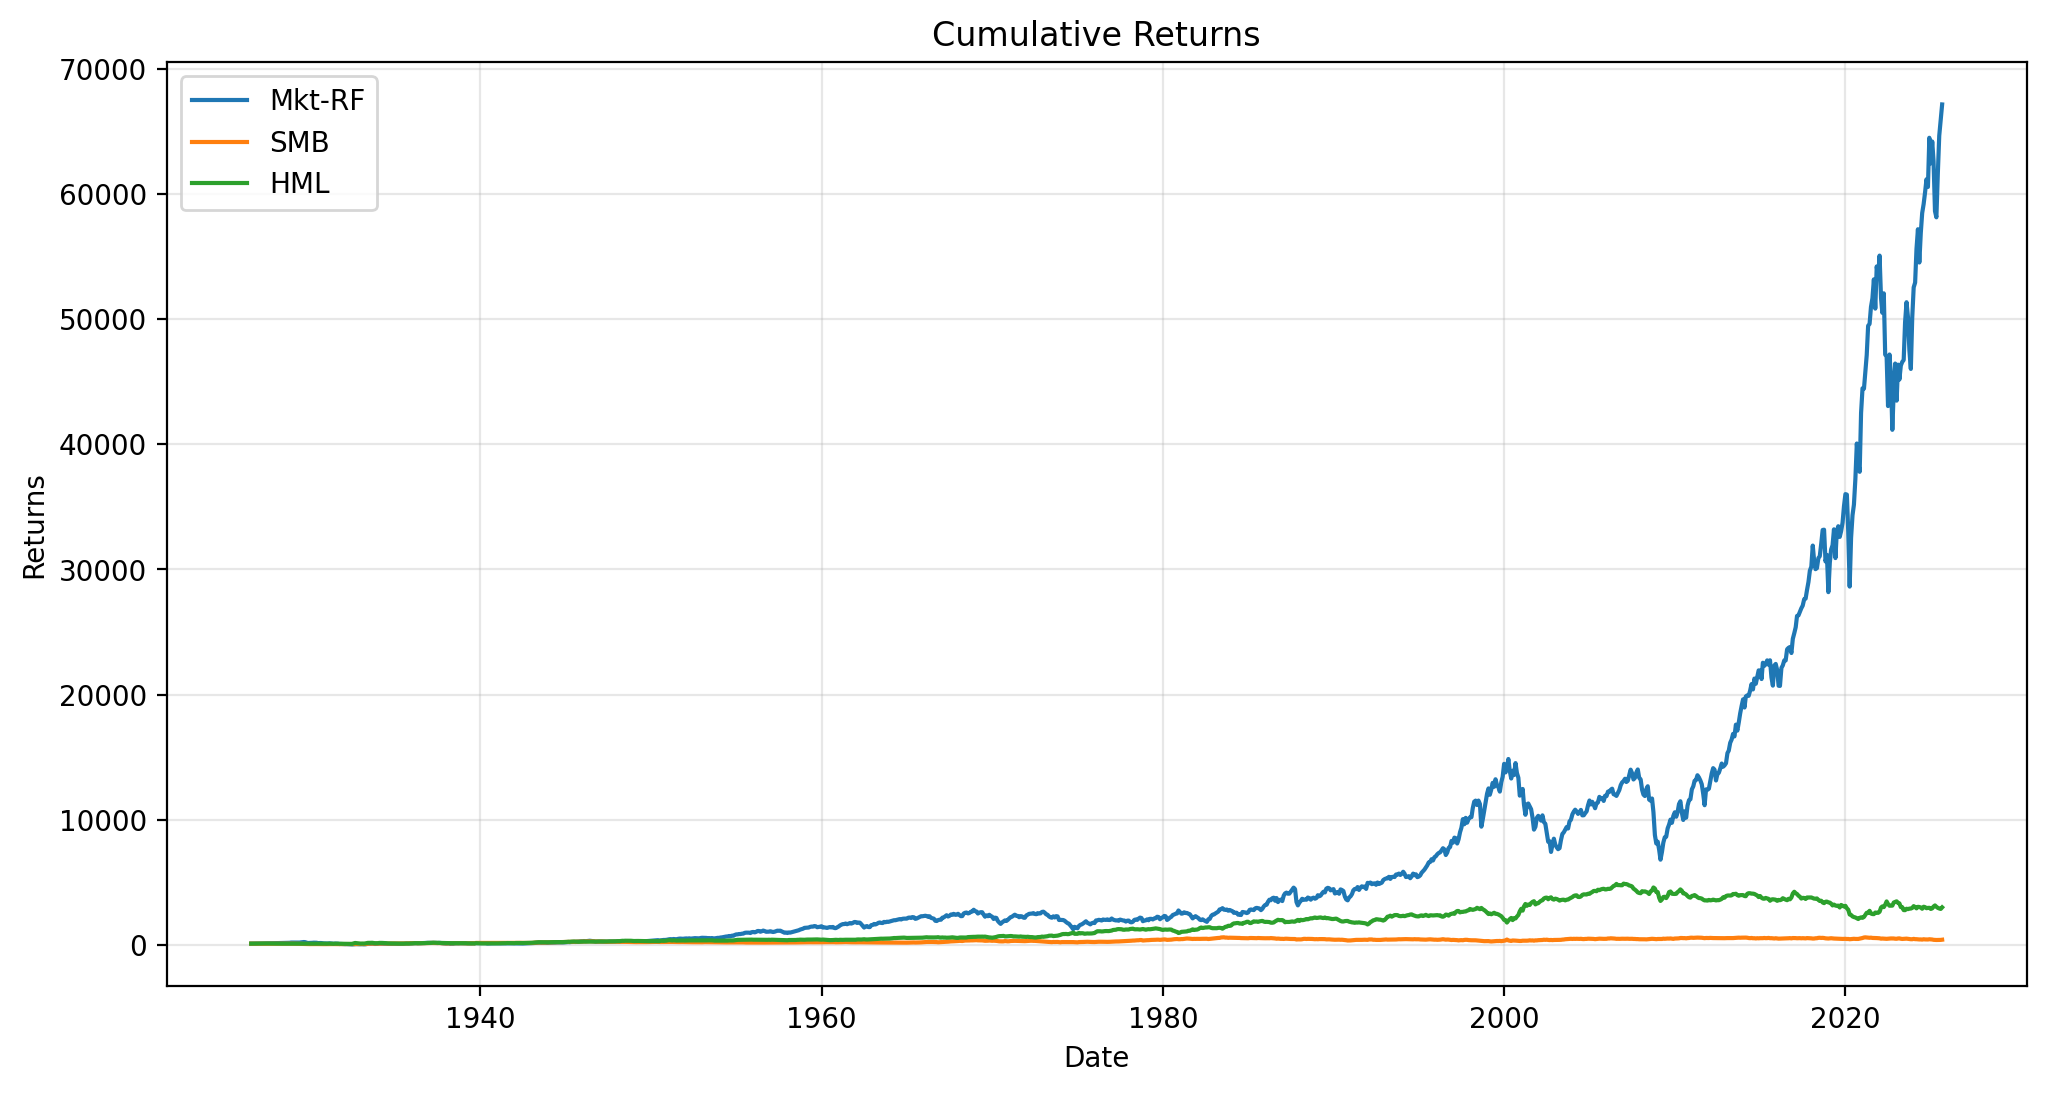

In [6]:
cumReturns = Calc_CumulativeReturn(factors)

plt.figure(figsize = (12, 6))
plt.plot(cumReturns["Mkt-RF"], label = "Mkt-RF")
plt.plot(cumReturns["SMB"], label = "SMB")
plt.plot(cumReturns["HML"], label = "HML")
plt.title("Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

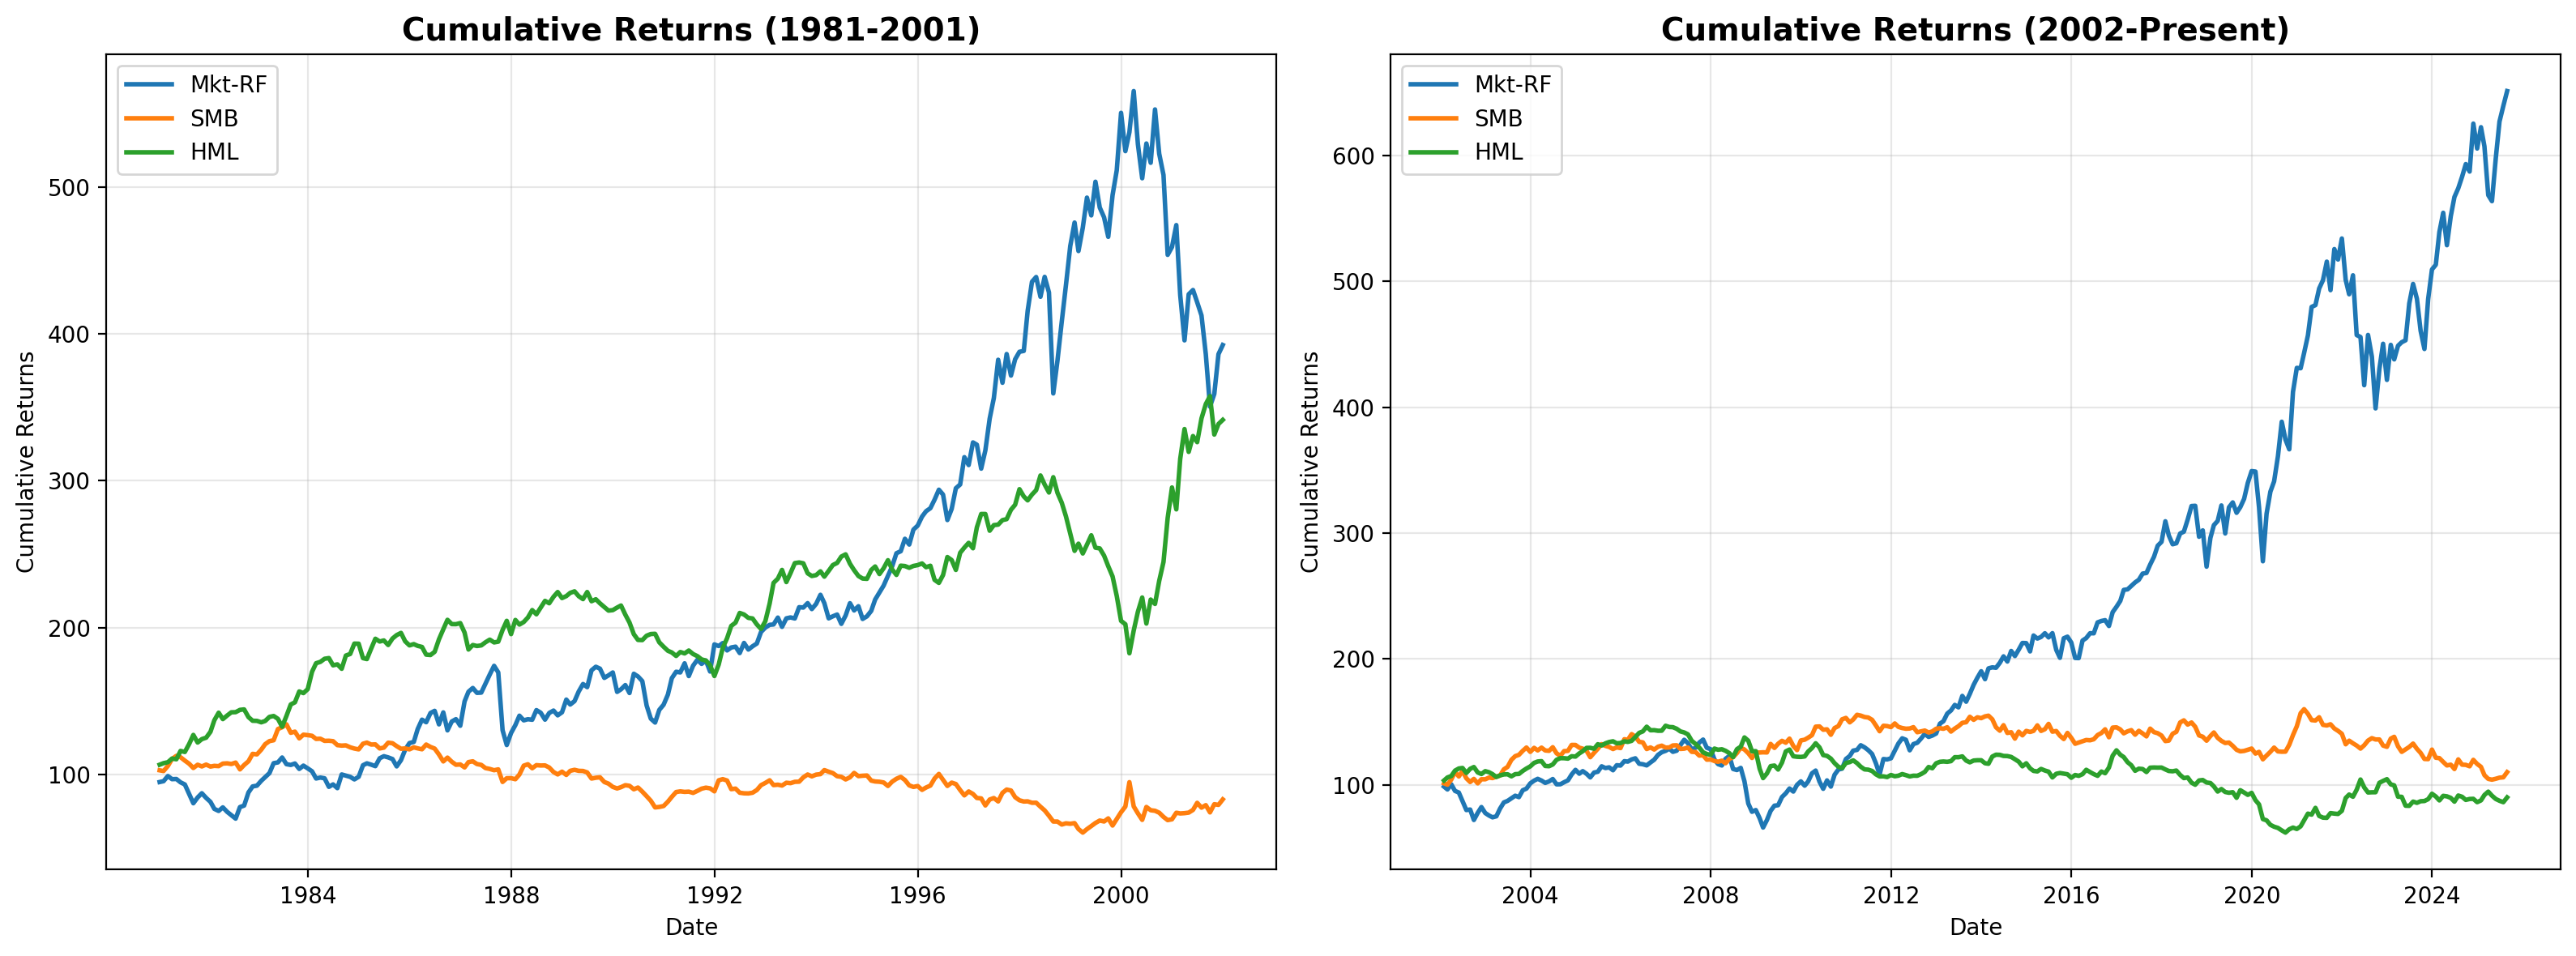

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

cumReturns_2001 = Calc_CumulativeReturn(sample_2001)
cumReturns_2025 = Calc_CumulativeReturn(sample_2025)

# Plot 1981-2001
axes[0].plot(cumReturns_2001["Mkt-RF"], label="Mkt-RF", linewidth=2)
axes[0].plot(cumReturns_2001["SMB"], label="SMB", linewidth=2)
axes[0].plot(cumReturns_2001["HML"], label="HML", linewidth=2)
axes[0].set_title("Cumulative Returns (1981-2001)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Cumulative Returns")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2002-Present
axes[1].plot(cumReturns_2025["Mkt-RF"], label="Mkt-RF", linewidth=2)
axes[1].plot(cumReturns_2025["SMB"], label="SMB", linewidth=2)
axes[1].plot(cumReturns_2025["HML"], label="HML", linewidth=2)
axes[1].set_title("Cumulative Returns (2002-Present)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Cumulative Returns")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.

- Does it appear that all three factors were valuable in 1981-2001?

  - Only market and value factors delivered strong returns. The size factor was essentially worthless or harmful during this period.

- And post-2001?
  
  - The market factor dominated. Size premium is minimal, and the value premium has essentially vanished. Growth stocks crushed value stocks during this era.

Would you advise DFA to continue emphasizing all three factors?

- DFA should reconsider their multi-factor approach and potentially shift toward market-beta strategies or explore alternative factors that have shown more consistent performance in modern markets.

---

## 3. CAPM

DFA believes that premia in stocks and stock portfolios is related to the three factors.

Let’s test `25` equity portfolios that span a wide range of size and value measures.

### Footnote

For more on the portfolio construction, see the description at [Ken French’s data library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/tw_5_ports.html). 

In [8]:
returns.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.058276,-0.017006,0.005118,-0.021477,0.019583,0.012118,0.024107,0.006056,-0.026082,-0.004527,...,0.015376,0.015460,0.013389,0.002765,0.024678,0.033248,0.060909,0.020285,0.031263,0.005623
1926-08-31,-0.020206,-0.080282,0.013968,0.021483,0.085104,0.023620,-0.007525,0.038984,0.002299,0.062937,...,0.013858,0.038587,0.019738,0.021336,0.053422,0.010169,0.041975,0.019769,0.054924,0.077576
1926-09-30,-0.048291,-0.026806,-0.043417,-0.032683,0.008586,-0.026849,-0.005252,0.010789,-0.032877,-0.009419,...,0.016897,-0.005246,-0.017724,0.014806,0.008730,-0.012951,0.036610,0.001384,-0.007497,-0.024284
1926-10-31,-0.093633,-0.035519,-0.035024,0.034413,-0.025452,-0.028014,-0.044191,-0.050767,-0.080271,-0.013213,...,-0.039136,-0.026528,-0.021058,-0.032532,-0.053525,-0.027382,-0.030061,-0.022467,-0.046725,-0.058129
1926-11-30,0.055888,0.041877,0.024384,-0.044495,0.005110,0.031023,-0.017317,0.030425,0.049538,0.027292,...,0.034492,0.023823,0.037315,0.051102,0.018213,0.044331,0.025355,0.015280,0.036596,0.025636


### Portfolios

Monthly **total** return data on `25` equity portfolios sorted by their size-value characteristics. Denote these as $\vec{r}^{i}$, for $n = 1,...,25$
.

- Note that while the factors were given as excess returns, the portfolios are total returns.

- For this entire problem, focus on the 1981-Present subsample.

In [9]:
returns.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.058276,-0.017006,0.005118,-0.021477,0.019583,0.012118,0.024107,0.006056,-0.026082,-0.004527,...,0.015376,0.015460,0.013389,0.002765,0.024678,0.033248,0.060909,0.020285,0.031263,0.005623
1926-08-31,-0.020206,-0.080282,0.013968,0.021483,0.085104,0.023620,-0.007525,0.038984,0.002299,0.062937,...,0.013858,0.038587,0.019738,0.021336,0.053422,0.010169,0.041975,0.019769,0.054924,0.077576
1926-09-30,-0.048291,-0.026806,-0.043417,-0.032683,0.008586,-0.026849,-0.005252,0.010789,-0.032877,-0.009419,...,0.016897,-0.005246,-0.017724,0.014806,0.008730,-0.012951,0.036610,0.001384,-0.007497,-0.024284
1926-10-31,-0.093633,-0.035519,-0.035024,0.034413,-0.025452,-0.028014,-0.044191,-0.050767,-0.080271,-0.013213,...,-0.039136,-0.026528,-0.021058,-0.032532,-0.053525,-0.027382,-0.030061,-0.022467,-0.046725,-0.058129
1926-11-30,0.055888,0.041877,0.024384,-0.044495,0.005110,0.031023,-0.017317,0.030425,0.049538,0.027292,...,0.034492,0.023823,0.037315,0.051102,0.018213,0.044331,0.025355,0.015280,0.036596,0.025636


### 1. Summary Statistics.

For each portfolio,

- Use the Risk-Free rate column in the factors tab to convert these total returns to excess returns.

- Calculate the (annualized) univariate statistics from `1.1`.

In [10]:
excessReturns = returns.sub(factors["RF"], axis = 0)
excessReturns.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.056076,-0.019206,0.002918,-0.023677,0.017383,0.009918,0.021907,0.003856,-0.028282,-0.006727,...,0.013176,0.013260,0.011189,0.000565,0.022478,0.031048,0.058709,0.018085,0.029063,0.003423
1926-08-31,-0.022706,-0.082782,0.011468,0.018983,0.082604,0.021120,-0.010025,0.036484,-0.000201,0.060437,...,0.011358,0.036087,0.017238,0.018836,0.050922,0.007669,0.039475,0.017269,0.052424,0.075076
1926-09-30,-0.050591,-0.029106,-0.045717,-0.034983,0.006286,-0.029149,-0.007552,0.008489,-0.035177,-0.011719,...,0.014597,-0.007546,-0.020024,0.012506,0.006430,-0.015251,0.034310,-0.000916,-0.009797,-0.026584
1926-10-31,-0.096833,-0.038719,-0.038224,0.031213,-0.028652,-0.031214,-0.047391,-0.053967,-0.083471,-0.016413,...,-0.042336,-0.029728,-0.024258,-0.035732,-0.056725,-0.030582,-0.033261,-0.025667,-0.049925,-0.061329
1926-11-30,0.052788,0.038777,0.021284,-0.047595,0.002010,0.027923,-0.020417,0.027325,0.046438,0.024192,...,0.031392,0.020723,0.034215,0.048002,0.015113,0.041231,0.022255,0.012180,0.033496,0.022536


In [11]:
mean, std, sharpe = Calc_MeanStdSharpe_Stock(excessReturns, 12)
var = Calc_Var(excessReturns)
result = pd.DataFrame({
    "Mean": mean,
    "Volatility": std,
    "Sharpe": sharpe,
    "VaR": var
})
result.T

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Mean,0.068285,0.079138,0.117213,0.135062,0.160757,0.077413,0.110993,0.115222,0.124235,0.147626,...,0.087755,0.093113,0.100442,0.116126,0.123467,0.082773,0.078023,0.084828,0.080513,0.114930
Volatility,0.412683,0.334279,0.306450,0.286639,0.317360,0.275990,0.258963,0.250012,0.257403,0.300293,...,0.214426,0.211211,0.218005,0.236142,0.296357,0.184885,0.181942,0.193094,0.226093,0.292780
Sharpe,0.165465,0.236743,0.382487,0.471192,0.506545,0.280493,0.428606,0.460867,0.482649,0.491607,...,0.409255,0.440855,0.460733,0.491763,0.416615,0.447701,0.428832,0.439311,0.356103,0.392547
VaR,-0.142903,-0.128362,-0.104112,-0.102063,-0.113591,-0.111098,-0.096367,-0.092983,-0.093828,-0.112550,...,-0.088349,-0.086295,-0.085302,-0.090491,-0.108508,-0.078898,-0.073093,-0.072119,-0.084174,-0.098240


### 2. CAPM

The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio's) expected excess return is completely a function of its beta to the equity market index (`SPY`, or in this case, `MKT`.)

Specifically, it asserts that, for any excess return, $\tilde{r}^i$, its mean is proportional to the mean excess return of the market, $\tilde{r}^{mkt}$, where the proportionality is the regression beta of $\tilde{r}^i$ on $\tilde{r}^{mkt}$.

$$ \mathbb{E} [\tilde{r}_t^i] = \beta^{i,mkt} \mathbb{E} [\tilde{r}_t^{mkt}] $$

Let's examine whether that seems plausible.

For each of the $n = 25$ test portfolios, run the CAPM time-series regression:

$$ \tilde{r}_t^i = \alpha^i + \beta^{i,mkt} \tilde{r}_t^{mkt} + \epsilon_t^i $$

So you are running 25 separate regressions, each using the $T$-sized sample of time-series data.

-  Report the betas and alphas for each test asset.
- Report the mean-absolute-error of the CAPM: $\text{MAE} = \frac{1}{n} \sum_{i=1}^n |\alpha_i|$

If the CAPM were true, what would we expect of the MAE?

- Report the estimated $\beta^{i,mkt}$, Treynor Ratio, $\alpha^i$, and Information Ratio for each of the $n$ regressions.
- If the CAPM model were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

In [12]:
portfolio = excessReturns.columns
betas_capm, alphas_capm, treynor_capm, info_capm, residual_capm = list(), list(), list(), list(), list()

for p in portfolio:
    y = excessReturns[p]
    x = factors["Mkt-RF"]
    Beta, Treynor_Ratio, Information_Ratio, Rsquared, Tracking_Error, Model = Calc_Beta_TreynorRatio_InfoRatio_RSquared_TrackingError(y, x, 12)
    betas_capm.append(Beta)
    alphas_capm.append(Model.params["const"])
    treynor_capm.append(Treynor_Ratio)
    info_capm.append(Information_Ratio)
    residual_capm.append(Model.resid)

result = pd.DataFrame({
    "Beta": betas_capm,
    "Alpha": alphas_capm,
    "Treynor": treynor_capm,
    "Information Ratio": info_capm
}, index = excessReturns.columns)
result

,Beta,Alpha,Treynor,Information Ratio
SMALL LoBM,1.602311,-0.005362,0.042616,-0.222975
ME1 BM2,1.392971,-0.003013,0.056813,-0.168670
ME1 BM3,1.359342,0.000392,0.086228,0.026587
ME1 BM4,1.264748,0.002532,0.106790,0.181788
SMALL HiBM,1.360529,0.004012,0.118158,0.247127
ME2 BM1,1.270198,-0.002310,0.060946,-0.189200
ME2 BM2,1.231694,0.000754,0.090114,0.072371
ME2 BM3,1.200621,0.001321,0.095969,0.135732
ME2 BM4,1.215841,0.001967,0.102180,0.185797
ME2 BM5,1.376946,0.002805,0.107213,0.209165


In [13]:
sumAlpha = 0
for i in range(len(excessReturns.columns)):
    sumAlpha += abs(alphas_capm[i])
print(f"MAE of the CAPM: {sumAlpha / len(excessReturns.columns):.4f}")

MAE of the CAPM: 0.0015


If the CAPM were true,

- Alpha: 
  
  - All alphas should be zero and the Expected MAE should be 0
  
  - The formula would be $\mathbb{E} [\tilde{r}_t^i] = \beta^{i,mkt} \mathbb{E} [\tilde{r}_t^{mkt}]$ with no unexplained component
  
  - A non-zero MAE indicates the CAPM does not fully explain the cross-section of returns 

- Treynor Ratio:
  
  - All portfolios should have the same Treynor Ratio, equal to market's expected returns
  
  - $\frac{\mathbb{E} [\tilde{r}_t^i]}{\beta^{i,mkt}} =  \mathbb{E} [\tilde{r}_t^{mkt}]$

- Information Ratio:
  
  - All information ratios should be Zero
  
  - $\frac{\alpha^i}{\sigma{(\epsilon^i)}} = 0$, because $\alpha^i = 0$

### 3. Cross-sectional Estimation

Let's test the CAPM directly. We already have what we need:

* The dependent variable, $(y)$: mean excess returns from each of the $n = 25$ portfolios.
* The regressor, $(x)$: the market beta from each of the $n = 25$ time-series regressions.

Then we can estimate the following equation:

$$
\underset{n \times 1 \text{ data}}{\mathbb{E} [\tilde{r}^i]} = \underset{\text{regression intercept}}{\eta} + \underset{n \times 1 \text{ data}}{\beta^{i,mkt}} \underset{\text{regression estimate}}{\lambda_{mkt}} + \underset{n \times 1 \text{ residuals}}{\nu}
$$

Note that

* we use sample means as estimates of $\mathbb{E} [\tilde{r}^i]$.
* this is a weird regression! The regressors are the betas from the time-series regressions we already ran!
* this is a single regression, where we are combining evidence across all $n = 25$ series. Thus, it is a cross-sectional regression!
* the notation is trying to emphasize that the intercept is different than the time-series $\alpha$ and that the regressor coefficient is different than the time-series betas.

Report

* the R-squared of this regression.
* the intercept, $\eta$.
* the regression coefficient, $\lambda_{mkt}$.

What would these three statistics be if the CAPM were completely accurate?

In [14]:
y = mean
x = sm.add_constant(betas_capm)

model = sm.OLS(y, x).fit()
print(f"R Squared: {model.rsquared:.4f}")
print(f"Intercept: {model.params["const"]:.4f}")
print(f"Coefficient: {model.params.drop("const")}")

R Squared: 0.0975
Intercept: 0.0480
Coefficient: x1    0.047793
dtype: float64


If the CAPM were completely accurate,

- The intercept $\eta$ would be 0

  - The intercept $\eta$ represents the expected excess return of a zero-beta portfolio. An asset or portfolio with a beta of 0 has no systematic risk. Therefore, its expected excess return (its return above the risk-free rate) should be 0.

- The regression coefficient $\lambda_{mkt}$ would be the expected market excess return
  
  - By matching the two equations, $\lambda_{mkt}$ (the "price of risk") should be equal to $E[\tilde{r}^{mkt}]$ (the "market risk premium"). This coefficient represents the reward, in terms of excess return, for taking on one unit of market risk (beta).

- The R-squared would be 1
  
  - If the CAPM is perfectly accurate, the only thing that explains differences in expected returns across portfolios is their beta. A perfect linear relationship results in an R-squared of 1.

### 4. Conclusion

Broadly speaking, do these results support DFA’s belief in size and value portfolios containing premia unrelated to the market premium?

Yes,

- R-squared of 0.0975 means that market beta explains less than 10% of the variation in average returns across $n=25$ portfolio

- The other 90% of returns is driven by other systematic risk factors

---

## 4. Extensions

### 1.

Re-do the analysis of 3.2 and 3.3, but instead of using the market return as the factor, use a new factor: the in-sample tangency portfolio of the $n = 25$ portfolios.

You will not use the factor data for this problem!

* Calculate $\tilde{r}^{tan}$ by solving the MV optimization of the $n$ excess returns.
* Consider this to be your single factor.

Instead of testing the CAPM, you will test the tangency-factor model:

$$
\mathbb{E} [\tilde{r}_t^i] = \beta^{i,tan} \mathbb{E} [\tilde{r}_t^{tan}]
$$

What do you find?


In [15]:
weights = Calc_TangencyWeights(excessReturns, 12)
portfolio_returns = excessReturns @ weights
betas, alphas, treynor, info = list(), list(), list(), list()
portfolio = excessReturns.columns

for p in portfolio:
    y = excessReturns[p]
    x = portfolio_returns
    Beta, Treynor_Ratio, Information_Ratio, Rsquared, Tracking_Error, Model = Calc_Beta_TreynorRatio_InfoRatio_RSquared_TrackingError(y, x, 12)
    betas.append(Beta)
    alphas.append(Model.params["const"])
    treynor.append(Treynor_Ratio)
    info.append(Information_Ratio)

result = pd.DataFrame({
    "Beta": betas,
    "Alpha": alphas,
    "Information Ratio": info
}, index = excessReturns.columns)
result

,Beta,Alpha,Information Ratio
SMALL LoBM,0.244296,-9.543571e-17,-2.811319e-15
ME1 BM2,0.283126,-5.064229e-17,-1.867584e-15
ME1 BM3,0.419343,-1.481163e-17,-6.242877e-16
ME1 BM4,0.483199,-1.727190e-17,-8.123496e-16
SMALL HiBM,0.575127,1.278356e-17,5.544792e-16
ME2 BM1,0.276954,-1.024986e-17,-4.630290e-16
ME2 BM2,0.397091,3.778816e-18,1.924182e-16
ME2 BM3,0.412221,-3.226870e-18,-1.730230e-16
ME2 BM4,0.444465,2.591483e-17,1.366135e-15
ME2 BM5,0.528148,-3.250649e-17,-1.476598e-15


In [16]:
sumAlpha = 0
for i in range(len(excessReturns.columns)):
    sumAlpha += abs(alphas[i])
print(f"MAE of the CAPM: {sumAlpha / len(excessReturns.columns):.4f}")

MAE of the CAPM: 0.0000


- Alphas and Information Ratios are all zero, therefore MAE of alphas is zero too
  
  - The tangency portfolio factor ($\tilde{r}^{tan}$) perfectly explains the time-series returns of all 25 assets

In [17]:
y = mean
x = sm.add_constant(betas)

model = sm.OLS(y, x).fit()
print(f"R Squared: {model.rsquared:.4f}")
print(f"Intercept: {model.params["const"]:.4f}")
print(f"Coefficient: {model.params.drop("const")}")

R Squared: 1.0000
Intercept: -0.0000
Coefficient: x1    0.279516
dtype: float64


In [18]:
mean_port, std, sharpe = Calc_MeanStdSharpe_Portfolio(excessReturns, weights, 12)
print(f" Tangency Portfolio Mean: {mean_port:.6f}")

 Tangency Portfolio Mean: 0.279516


- The R-squared = 1
  
  - The tangency portfolio is the one portfolio of these 25 assets that is perfectly mean-variance efficient. This means the 25 assets' betas relative to this portfolio will perfectly explain their average returns. All 25 portfolios will lie exactly on the Security Market Line.

- The intercept $\eta$ = 0

  - The model perfect fit the expected returns of tangency portfolio.

- The regression coefficient $\lambda_{mkt}$ is equal to $E[\tilde{r}^{tan}]$

## 2.

Re-do the analysis of 3.2 and 3.3, but instead of using only the `MKT` factor, use `MKT`, `SMB`, and `HML`.

(Note again that all three are already given as **excess** returns, so there is no need to use the risk-free rate data.)

Thus, instead of testing the CAPM, you will be testing the Fama-French 3-Factor Model.

$$
\mathbb{E} [\tilde{r}_t^i] = \beta^{i,mkt} \mathbb{E} [\tilde{r}_t^{mkt}] + \beta^{i,size} \mathbb{E} [\tilde{r}_t^{size}] + \beta^{i,val} \mathbb{E} [\tilde{r}_t^{val}]
$$

In [19]:
portfolio = excessReturns.columns
betas, beta_market, beta_SMB, beta_HML, alphas, treynor, info = list(), list(), list(), list(), list(), list(), list()
factor = ["Mkt-RF", "SMB", "HML"]

for p in portfolio:
    y = excessReturns[p]
    x = factors[factor]
    Beta, Treynor_Ratio, Information_Ratio, Rsquared, Tracking_Error, Model = Calc_Beta_TreynorRatio_InfoRatio_RSquared_TrackingError(y, x, 12)
    betas.append(Beta)
    beta_market.append(Beta.iloc[0])
    beta_SMB.append(Beta.iloc[1])
    beta_HML.append(Beta.iloc[2])
    alphas.append(Model.params["const"])
    treynor.append(Treynor_Ratio)
    info.append(Information_Ratio)

result = pd.DataFrame({
    "Beta_Market": beta_market,
    "Beta_SMB": beta_SMB,
    "Beta_HML": beta_HML,
    "Alpha": alphas,
    "Information Ratio": info
}, index = excessReturns.columns)
result

,Beta_Market,Beta_SMB,Beta_HML,Alpha,Information Ratio
SMALL LoBM,1.267679,1.476108,0.352430,-0.006749,-0.338160
ME1 BM2,1.070376,1.530605,0.205470,-0.004065,-0.346989
ME1 BM3,1.048068,1.239233,0.494875,-0.001254,-0.147615
ME1 BM4,0.942412,1.233228,0.574915,0.000695,0.109131
SMALL HiBM,0.980069,1.286924,0.889117,0.001397,0.197879
ME2 BM1,1.085898,1.151637,-0.228576,-0.002176,-0.315222
ME2 BM2,1.022352,1.005671,0.117840,0.000104,0.018852
ME2 BM3,0.990023,0.831447,0.343521,0.000189,0.035372
ME2 BM4,0.969355,0.828300,0.582825,0.000258,0.054760
ME2 BM5,1.066119,0.925200,0.883883,0.000333,0.061047


In [20]:
sumAlpha = 0
for i in range(len(excessReturns.columns)):
    sumAlpha += abs(alphas[i])
print(f"MAE of the CAPM: {sumAlpha / len(excessReturns.columns):.4f}")

MAE of the CAPM: 0.0012


In [21]:
y = mean
x = sm.add_constant(betas)

model = sm.OLS(y, x).fit()
print(f"R Squared: {model.rsquared:.4f}")
print(f"Intercept: {model.params["const"]:.4f}")
print(f"Coefficient: {model.params.drop("const")}")

R Squared: 0.6728
Intercept: 0.2017
Coefficient: x1   -0.113537
x2    0.011934
x3    0.044619
dtype: float64


- This model works better than CAPM
  
  - SMB (size) and HML (value) successfully explain the "abnormal returns" (alphas)
  
  - The three factors collectively explain 67.28% of the cross-sectional variation in average portfolio returns, dramatic improvement from the CAPM (9.75%)
  
  - The intercept increase from 0.048 to 0.2017, which shows there is still an "abnormal return" that even these three factors cannot explain

## 3.

We measured how well the CAPM performs by checking the MAE of the time-series alphas.

Under classic statistical assumptions, we can test the null hypothesis that the CAPM works by calculating,

$$
H = T \left[1 + (\text{SR}_{mkt})^2\right]^{-1} \boldsymbol{\alpha}' \boldsymbol{\Sigma}_{\epsilon}^{-1} \boldsymbol{\alpha}
$$

This test statistic has a chi-squared distribution...

$$
H \sim \chi_n^2
$$

Note the following:

* $\boldsymbol{\alpha}$ is an $n \times 1$ vector of the individual regression alphas, $\alpha^i$.
* $\boldsymbol{\Sigma}_{\epsilon}$ is the $n \times n$ covariance matrix of the time-series of regression residuals, $\epsilon^i$, corresponding to each regression.
* $\text{SR}_{mkt}$ is the Sharpe-Ratio of $\tilde{r}^{mkt}$.

The test statistic, $H$, has a chi-squared distribution with $n = 25$ degrees of freedom. So under the null hypothesis of the CAPM holding, $H$ should be small, and the distribution allows us to calculate the probability of seeing such a large $H$, conditional on the CAPM being true.

* Which is a stricter test: checking whether any of the $n$ values of $\alpha^i$ have a statistically significant t-test or checking whether $H$ calculated above is significant?
* Conceptually, how does the test-statistic $H$ relate to checking whether $\tilde{r}^{mkt}$ spans the tangency portfolio?

In [22]:
T = len(excessReturns)
# in-sample Sharpe Ratio calculated at the same frequency as data (e.g., monthly), so should not be annualized
sharpe_mkt = factors["Mkt-RF"].mean() / factors["Mkt-RF"].std()
residual_df = pd.concat(residual_capm, axis = 1)
residual_df.columns = excessReturns.columns
residual_covMat = residual_df.cov()
alpha_vec = np.array(alphas_capm)

h = T * ((1 + sharpe_mkt ** 2)**-1) * (alpha_vec @ np.linalg.inv(residual_covMat) @ alpha_vec)
print(h)

85.39624154652681


1. $H$ statistic is the stricter and more statistically powerful test.

- Individual t-tests:
  
  - If run 25 separate t-tests at a 5% significance level, expected number of tests to be significant is $25 * 0.05 = 1.25$ purely by random chance, even if all the alphas were truly zero.
  
- $H$ test:
  
  - It tests the null hypothesis that all 25 alphas are simultaneously equal to zero ($H_0: \alpha = 0$). 
  
  - It accounts for the covariance between the assets' residuals and aggregates all the pricing errors into a single number. It's much harder for the model to pass this joint test than to pass 24 out of 25 individual tests.

2. The $H$ statistic is the formal test for the core prediction of the CAPM.

   - The CAPM model is true if and only if the market portfolio ($\tilde{r}^{mkt}$) is the mean-variance efficient tangency portfolio.
   
   - If the market portfolio is the tangency portfolio, then all assets must lie perfectly on the Security Market Line (SML).
   
   - If all assets lie on the SML, then their "abnormal returns" (alphas) must all be zero.
   
   - The $H$ statistic tests the joint hypothesis that all alphas are zero ($H_0: \boldsymbol{\alpha} = 0$).

Therefore, testing $H=0$ is the same as testing if $\tilde{r}^{mkt}$ is the tangency portfolio.